In [1]:
from loaders import *
import matplotlib.pyplot as plt
import scipy.stats
from comparison_util import *

In [2]:
truth = load_index()
equ = load_equibind()
gni = load_gnina()
true_ligand = load_equibind(path = "/home/amfaber/gnina_own/results/true_ligand_minimize/")
score_only = load_equibind(path = "/home/amfaber/gnina_own/results/equibind_score_only")

merged = equ.merge(truth, on = "name")
gndtr = merged["aff"]
merged_true_gnd = true_ligand.merge(truth, on = "name")
merged2 = gni.merge(truth, on = "name")
merged2.index = pd.MultiIndex.from_frame(merged2[["name", "mode"]])
merged2.drop(columns = ["name", "mode"], inplace = True)

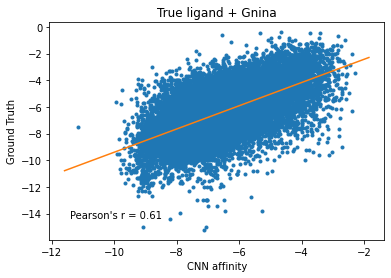

In [4]:
Linreg(-merged_true_gnd["CNNaffinity"], merged_true_gnd["aff"], coefpos = (0.8, 0.1))
path = "/home/amfaber/filesharing_ubuntu/Figures/Benchmarking equibind with gnina/"
plt.xlabel("CNN affinity")
plt.ylabel("Ground Truth")
plt.title("True ligand + Gnina")
plt.savefig(os.path.join(path, "true_ligand_minimize_CNNaffinity.png"), dpi = 200)

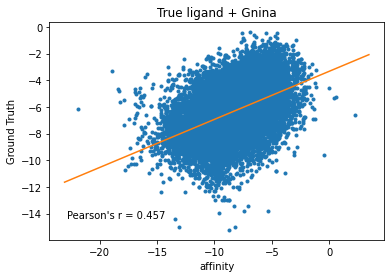

In [21]:
Linreg(merged_true_gnd["affinity1"], merged_true_gnd["aff"], coefpos = (0.85, 0.85))
path = "/home/amfaber/filesharing_ubuntu/Figures/Benchmarking equibind with gnina/"
plt.xlabel("affinity")
plt.ylabel("Ground Truth")
plt.title("True ligand + Gnina")
plt.savefig(os.path.join(path, "true_ligand_affinity.png"), dpi = 200)

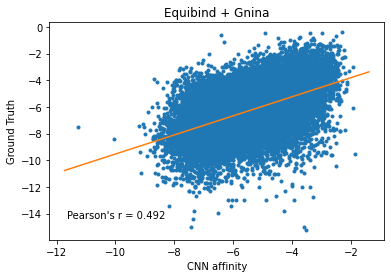

In [22]:
Linreg(-merged["CNNaffinity"], merged["aff"], coefpos = (0.85, 0.85))
path = "/home/amfaber/filesharing_ubuntu/Figures/Benchmarking equibind with gnina/"
plt.xlabel("CNN affinity")
plt.ylabel("Ground Truth")
plt.title("Equibind + Gnina")
plt.savefig(os.path.join(path, "equibind_docking_CNNaffinity.png"), dpi = 200)

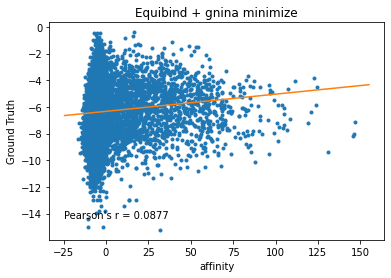

In [23]:
Linreg(merged["affinity1"], gndtr, coefpos = (0.8, 0.2))
path = "/home/amfaber/filesharing_ubuntu/Figures/Benchmarking equibind with gnina/"
plt.title("Equibind + gnina minimize")
plt.xlabel("affinity")
plt.ylabel("Ground Truth")
plt.savefig(os.path.join(path, "equibind_docking_affinity.png"), dpi = 200)

In [19]:
def plotmodes(feature, outname, path = "/home/amfaber/filesharing_ubuntu/Figures/Benchmarking equibind with gnina/", title = None,
             xlabel = None, ylabel = None):
    def runif(fn, *x):
        if x is not None:
            fn(*x)
    fig, axes = plt.subplots(2, 5, figsize = np.array([16,9])*0.4*np.array([5, 2]), tight_layout = True)
    means = merged2.groupby("name").mean()
    Linreg(means[feature], means["aff"], ax = axes[0, 0])
    axes[0, 0].text(0.5, 0.9, f"Mean of modes", transform = axes[0, 0].transAxes, ha = "center")
    for i, ax in enumerate(axes.flatten()[1:]):
        Linreg(merged2.loc[(slice(None), i+1), feature], merged2.loc[(slice(None), i+1), "aff"], ax = ax)
        ax.text(0.5, 0.9, f"Mode {i+1}", transform = ax.transAxes, ha = "center")
    
    setxlabel = lambda fig, s: fig.text(0.5, 0, s, va = "top", ha = "center")
    setylabel = lambda fig, s: fig.text(0, 0.5, s, va = "center", ha = "right", rotation = 90)
    runif(fig.suptitle, title)
    runif(setxlabel, fig, xlabel)
    runif(setylabel, fig, ylabel)
    fig.set_facecolor("w")
    plt.savefig(os.path.join(path, outname), dpi = 500, bbox_inches = "tight")

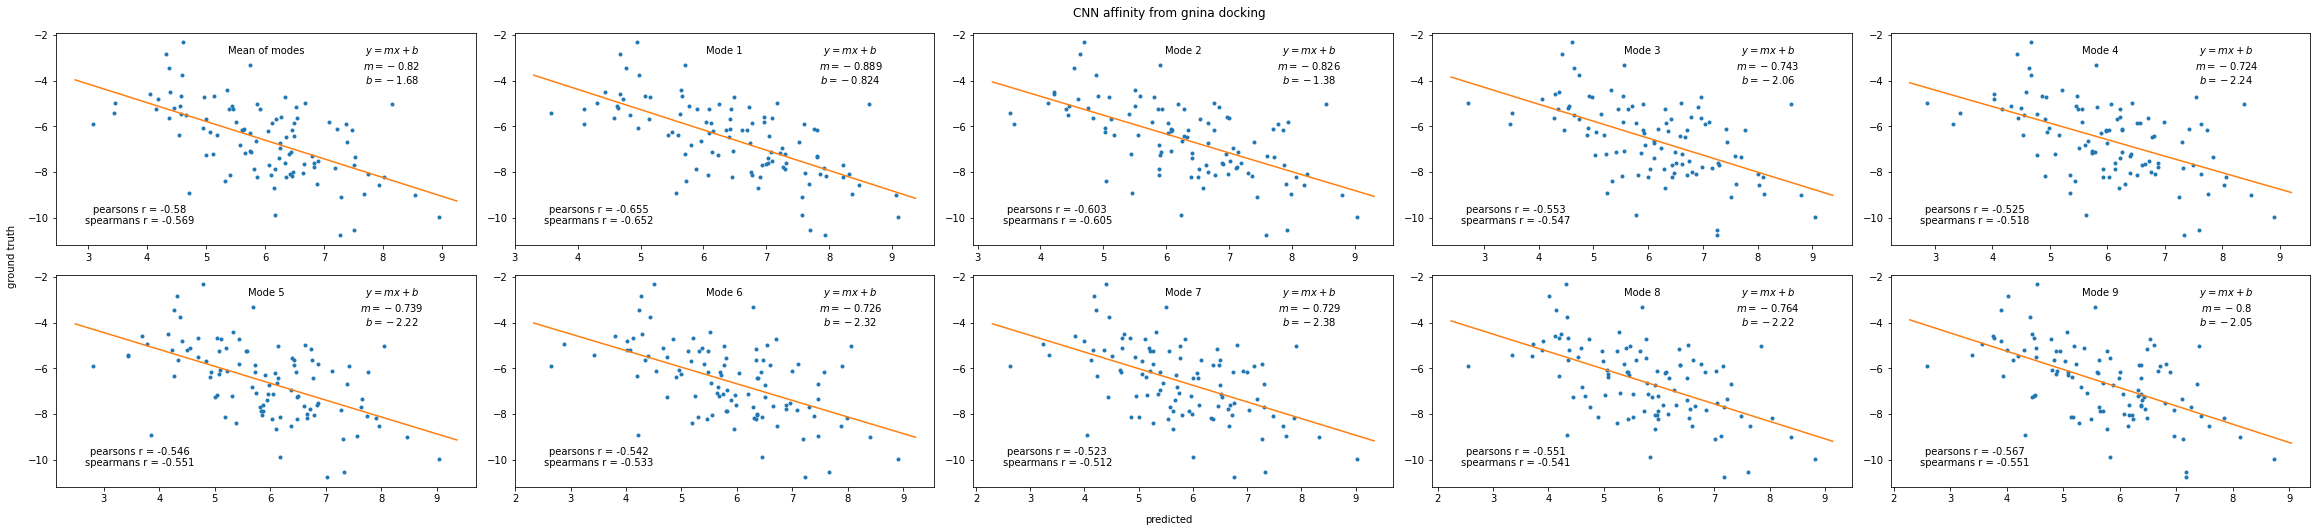

In [20]:
plotmodes("CNNaffinity", "gnina_docking_CNNaffinity.png", title = "CNN affinity from gnina docking",
          xlabel = "predicted", ylabel = "ground truth")

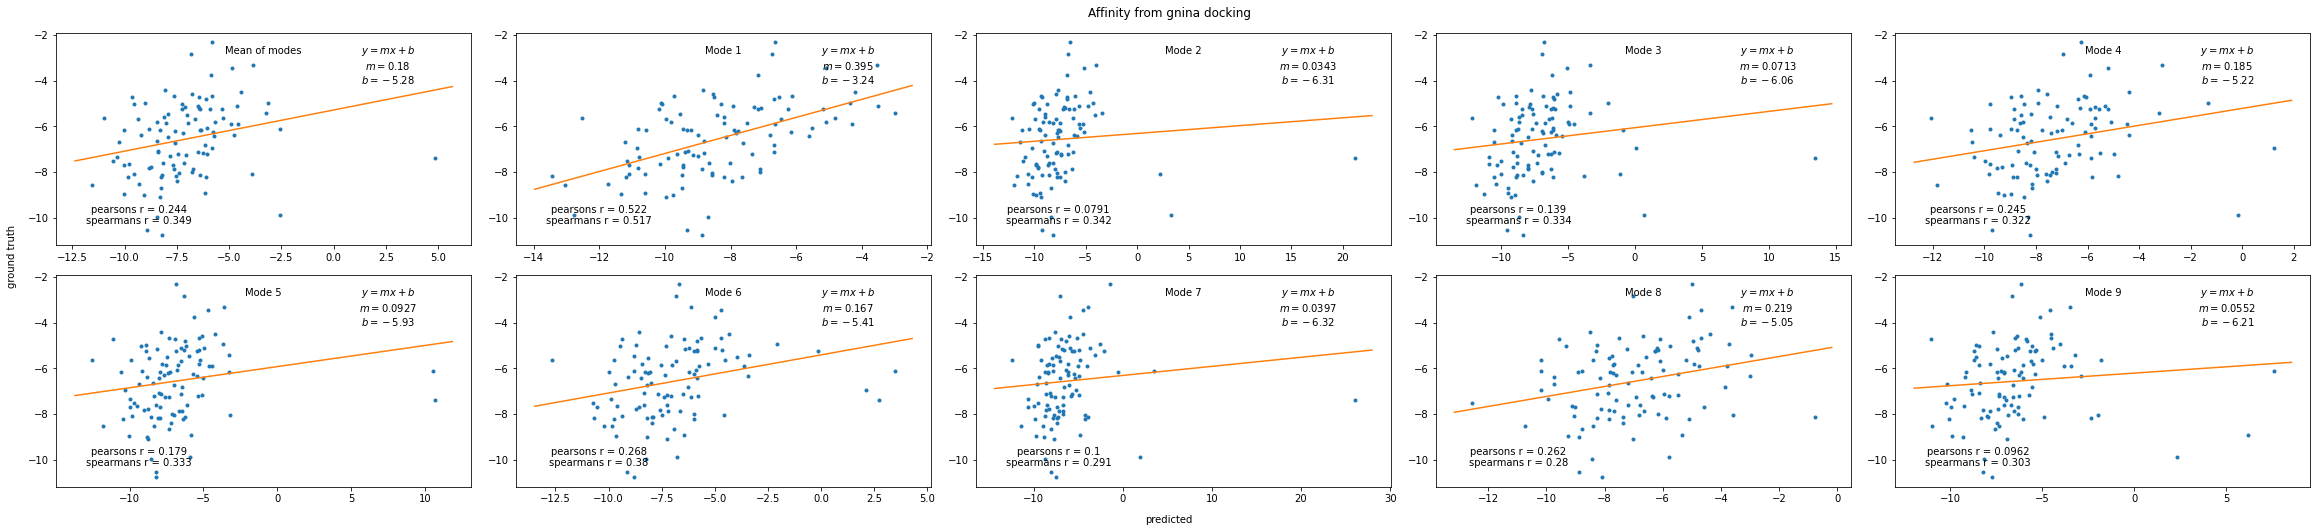

In [21]:
plotmodes("affinity", "gnina_docking_affinity.png", title = "Affinity from gnina docking",
          xlabel = "predicted", ylabel = "ground truth")

In [ ]:
fig, axes = plt.subplots(2, 5, figsize = np.array([16,9])*0.4*np.array([5, 2]))
means = merged2.groupby("name").mean()
Linreg(means["CNNaffinity"], means["aff"], ax = axes[0, 0])
axes[0, 0].text(0.5, 0.9, f"Mean of modes", transform = axes[0, 0].transAxes, ha = "center")
for i, ax in enumerate(axes.flatten()[1:]):
    Linreg(merged2.loc[(slice(None), i+1), "CNNaffinity"], merged2.loc[(slice(None), i+1), "aff"], ax = ax)
    ax.text(0.5, 0.9, f"Mode {i+1}", transform = ax.transAxes, ha = "center")
plt.savefig("/home/amfaber/filesharing_ubuntu/idk.png", dpi = 500)